## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")
import time

Let's import from neural_de the rain removal method

In [2]:
from neural_de.transformations import DeRainEnhancer

2025-02-28 10:50:34.540477: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 10:50:34.556968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740739834.574778   37585 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740739834.580898   37585 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 10:50:34.599597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

We load an example image

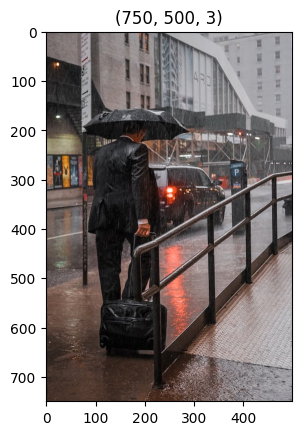

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
start=time.time()
input_path = Path('../examples/images/street-rain-men.jpeg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

## Enhancing an image

We create an instance of ResolutionShift :
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least once, they will then be stored directly on the machine). Once the model is downloaded you can remove or comment the following cell.

In [4]:

shifter = DeRainEnhancer()

[02-28 10:50:37] {/home/jovyan/Maturation/neural_DE/neuralde/examples/../neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[02-28 10:50:37] {/home/jovyan/Maturation/neural_DE/neuralde/examples/../neural_de/transformations/_derain_enhancer.py:54} INFO - Checking model availability...
[02-28 10:50:38] {/home/jovyan/Maturation/neural_DE/neuralde/examples/../neural_de/utils/_minio.py:67} INFO - Model already available locally, skipping download
[02-28 10:50:38] {/home/jovyan/Maturation/neural_DE/neuralde/examples/../neural_de/transformations/_derain_enhancer.py:73} INFO - Trained model GT-rain loaded


We apply the transform method to any number of images. 
- we can have multiple images per call of transform, and call transform multiple time with the same shifter.
- for now, only ratio=2 is available for upsampling, as the underlaying transformer was trained for a 2x resolution.

In [5]:
derained_images = shifter.transform([image])


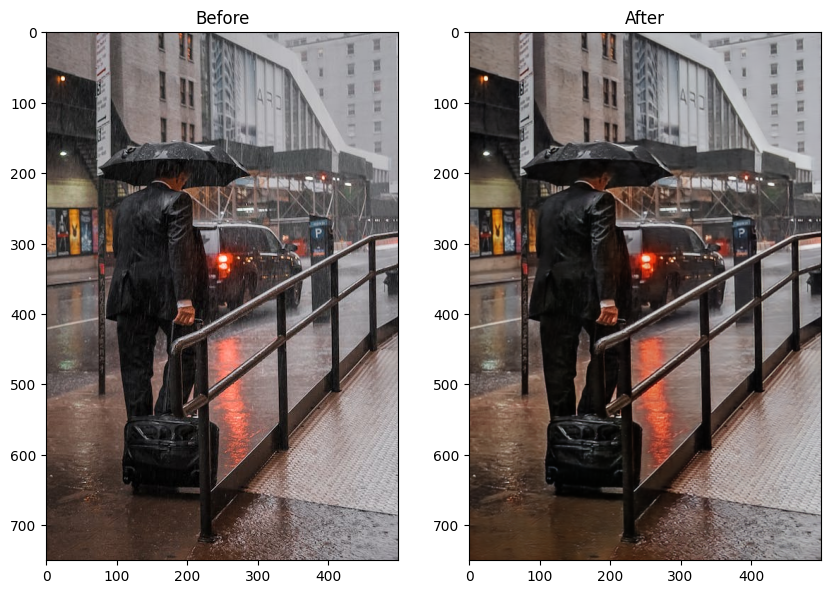

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(derained_images[0])
plt.show()

In [7]:
end=time.time()
print("temps final : ",end-start)

temps final :  29.2198429107666
